# Paper figures

This notebook produces the figures for the paper **The bright side of the light curve: a general photometric model for transiting and non-transiting exorings**.

### Packages and data required

In [515]:
import pryngles as pr
import numpy as np
import matplotlib.pyplot as plt
pr.__version__
%matplotlib nbagg

##-MS-##
plt.rcParams.update({'font.size': 14,})
import cmasher as cmr
from matplotlib import cm
color=cm.turbo(np.linspace(0,1,12))

from PyAstronomy import pyasl

PPM=1e6

## Simple reflection

In [603]:
defpars=dict(Nr=1000,Np=1000,Nb=0,physics=dict(AL=1,AS=1,taug=1))
def lightCurve(posobs,**ringpars):
    global defpars
    thispars=defpars.copy()
    thispars.update(ringpars)

    P=pr.RingedPlanet(**thispars)
    P.changeObserver(posobs)

    lamb_initial=+0.0*pr.DEG
    lamb_final=+360*pr.DEG
    lambs=np.linspace(lamb_initial,lamb_final,100)
    Rps=[]
    Rrs=[]
    S=[]
    ts=[]
    for lamb in lambs:
        P.changeStellarPosition(lamb)
        ts+=[P.t*P.CU.UT/pr.Const.days]
        P.behavior["shadows"]=1
        P._updateIllumination()
        P._updateVisibility()
        P._updateActivity()
        P.updateOpticalFactors()
        P.updateDiffuseReflection()
        Rps+=[P.Rip.sum()]
        Rrs+=[P.Rir.sum()]   
        P.updateTransit()
        S+=[P.Rip.sum()+P.Rir.sum()-(P.Tip.sum()+P.Tir.sum())]

    ts=np.array(ts)
    Rps=np.array(Rps)
    Rrs=np.array(Rrs)
    S=np.array(S)

    #Middle transit
    ts=np.unwrap(ts,period=P.T*P.CU.UT/pr.Const.days)
    ts-=ts[0]    
    return ts,lambs,Rps,Rrs,S,P

In [644]:
defpars=dict(Nr=5000,Np=5000,Nb=0,physics=dict(AL=1,AS=1,taug=1))
def lightCurveTime(posobs,**ringpars):
    global defpars
    thispars=defpars.copy()
    thispars.update(ringpars)

    P=pr.RingedPlanet(**thispars)
    P.changeObserver(posobs)

    ts=np.linspace(0,P.T,100)
    Rps=[]
    Rrs=[]
    S=[]
    lambs=[]
    for t in ts:
        P.changeStellarPosition(t,kepler=True)
        lambs+=[P.lamb]
        P.behavior["shadows"]=0
        P._updateIllumination()
        P._updateVisibility()
        P._updateActivity()
        P.updateOpticalFactors()
        P.updateDiffuseReflection()
        Rps+=[P.Rip.sum()]
        Rrs+=[P.Rir.sum()]   
        P.updateTransit()
        S+=[P.Rip.sum()+P.Rir.sum()-(P.Tip.sum()+P.Tir.sum())]

    lambs=np.unwrap(np.mod(lambs,2*np.pi))
    Rps=np.array(Rps)
    Rrs=np.array(Rrs)
    S=np.array(S)

    #Middle transit
    return ts,lambs,Rps,Rrs,S,P

In [645]:
c=color[1]
posobs=[90*pr.DEG,90*pr.DEG]
AL=1
AS=1
#Lommel-Seeliger
#law=lambda x,y:x*y/(x+y)
#Lambertian
law=lambda x,y:x
ringpars=dict(i=30*pr.DEG,lambq=30*pr.DEG,a=0.1,e=0.3,physics=dict(AL=AL,AS=AS,taug=1,reflection_rings_law=law))
ts,lambs,Rps,Rrs,S,P=lightCurveTime(posobs,**ringpars)
cu2day=P.CU.UT/pr.Const.days
"""
P.changeStellarPosition(30.0*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0)
plt.close("all")
#fig1
#""";

In [646]:
P.gamma0,P.gammap0

(1, 0.1590576171875)

In [647]:
np.mod(lambs*pr.RAD,360)

array([ 30.        ,  37.07103499,  44.09285308,  51.01881246,
        57.80708675,  64.42231512,  70.83653618,  77.02941589,
        82.98788609,  88.70536657,  94.18075277,  99.4173257 ,
       104.42169949, 109.20287829, 113.77145766, 118.13897861,
       122.31742565, 126.31885128, 130.15510578, 133.83765161,
       137.37744325, 140.78485677, 144.06965571, 147.2409831 ,
       150.30737159, 153.27676565, 156.15655145, 158.95359106,
       161.6742588 , 164.3244781 , 166.90975775, 169.43522684,
       171.905668  , 174.32554873, 176.69905065, 179.0300967 ,
       181.32237638, 183.57936908, 185.80436573, 188.00048874,
       190.17071051, 192.31787063, 194.44469188, 196.55379518,
       198.64771363, 200.72890573, 202.799768  , 204.86264695,
       206.91985069, 208.97366011, 211.02633989, 213.08014931,
       215.13735305, 217.200232  , 219.27109427, 221.35228637,
       223.44620482, 225.55530812, 227.68212937, 229.82928949,
       231.99951126, 234.19563427, 236.42063092, 238.67

<IPython.core.display.Javascript object>


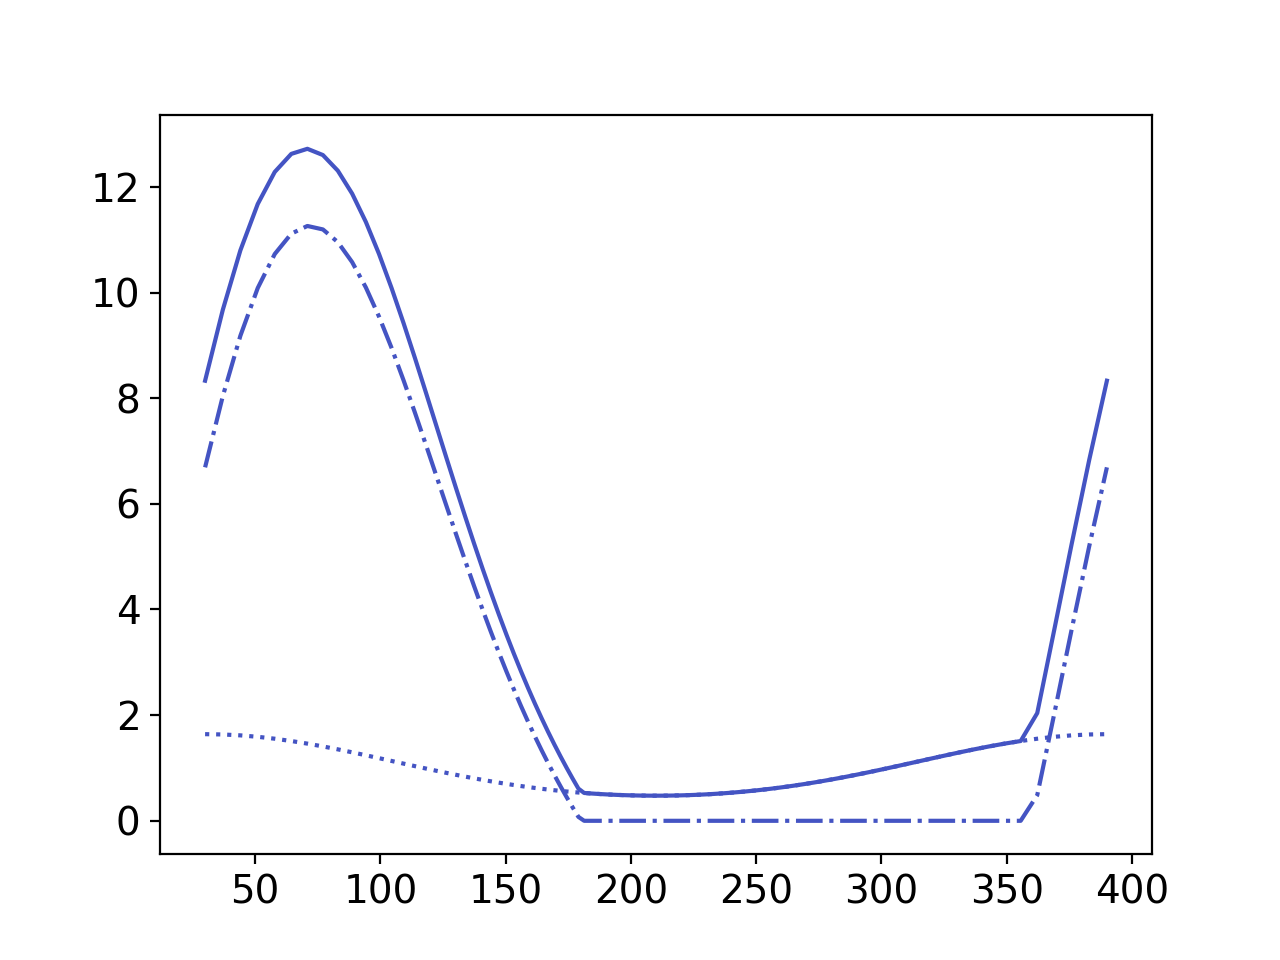

In [648]:
fig=plt.figure()
ax=fig.gca()    

"""
ax.plot(ts*cu2day,1e6*Rrs,'r-.',color=c)
ax.plot(ts*cu2day,1e6*Rps,'b:',color=c)
ax.plot(ts*cu2day,1e6*S,'k-',
        label=f"e = {ringpars['e']}",
        color=c)
"""

ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=f"e = {ringpars['e']}",
        color=c)

Analytical approximation to the brightness of the disk:

In [649]:
"""
t=0
pos=orbit.xyzPos(t)
f=orbit.trueAnomaly(t)
print(pos,f*pr.RAD)
#""";

In [650]:
#Orbit
orbit=pyasl.KeplerEllipse(a=P.a,per=P.T,e=P.e,tau=0,Omega=0.0,i=0.0,w=P.lambq*pr.RAD)

#Normal to the ring (ecliptic coordinates)
nr=np.array((0,np.sin(P.i),np.cos(P.i)))
#Normal to the observer
no=np.array([0,0,1])
#Area of the planet
Ap=np.pi*P.Rp**2
#Area of the ring
Ar=np.pi*((P.fe*P.Rp)**2-(P.fi*P.Rp)**2)
Rars=[]
Raps=[]
for t in ts:
    #Distance of the star to the planet
    rvec=orbit.xyzPos(t)
    r=np.linalg.norm(rvec)
    #Vector to the star
    ns=np.array([rvec[0],rvec[1],0])/r
    #Stellar light intensity
    S=1/(4*np.pi*(r/P.Rstar)**2)
    #----------------------------------------------
    #PLANET
    #----------------------------------------------
    Rp=AS*S*2/3*P.Rp**2
    Raps+=[Rp]
    #----------------------------------------------
    #RING
    #----------------------------------------------
    #Sun illumination
    cosL=np.dot(nr,ns)
    if cosL>0:
        #Brightness of sun on the disk
        B=S*cosL
        #Brightness of the disk from the observer
        cosZ=np.dot(nr,no)
        Rr=AL*B*Ar*cosZ
        Rars+=[Rr]
        #print(lamb*pr.RAD,r,S,cosL,B,cosZ,R)
    else:
        Rars+=[0]
    
Rars=np.array(Rars)
Raps=np.array(Raps)

<IPython.core.display.Javascript object>


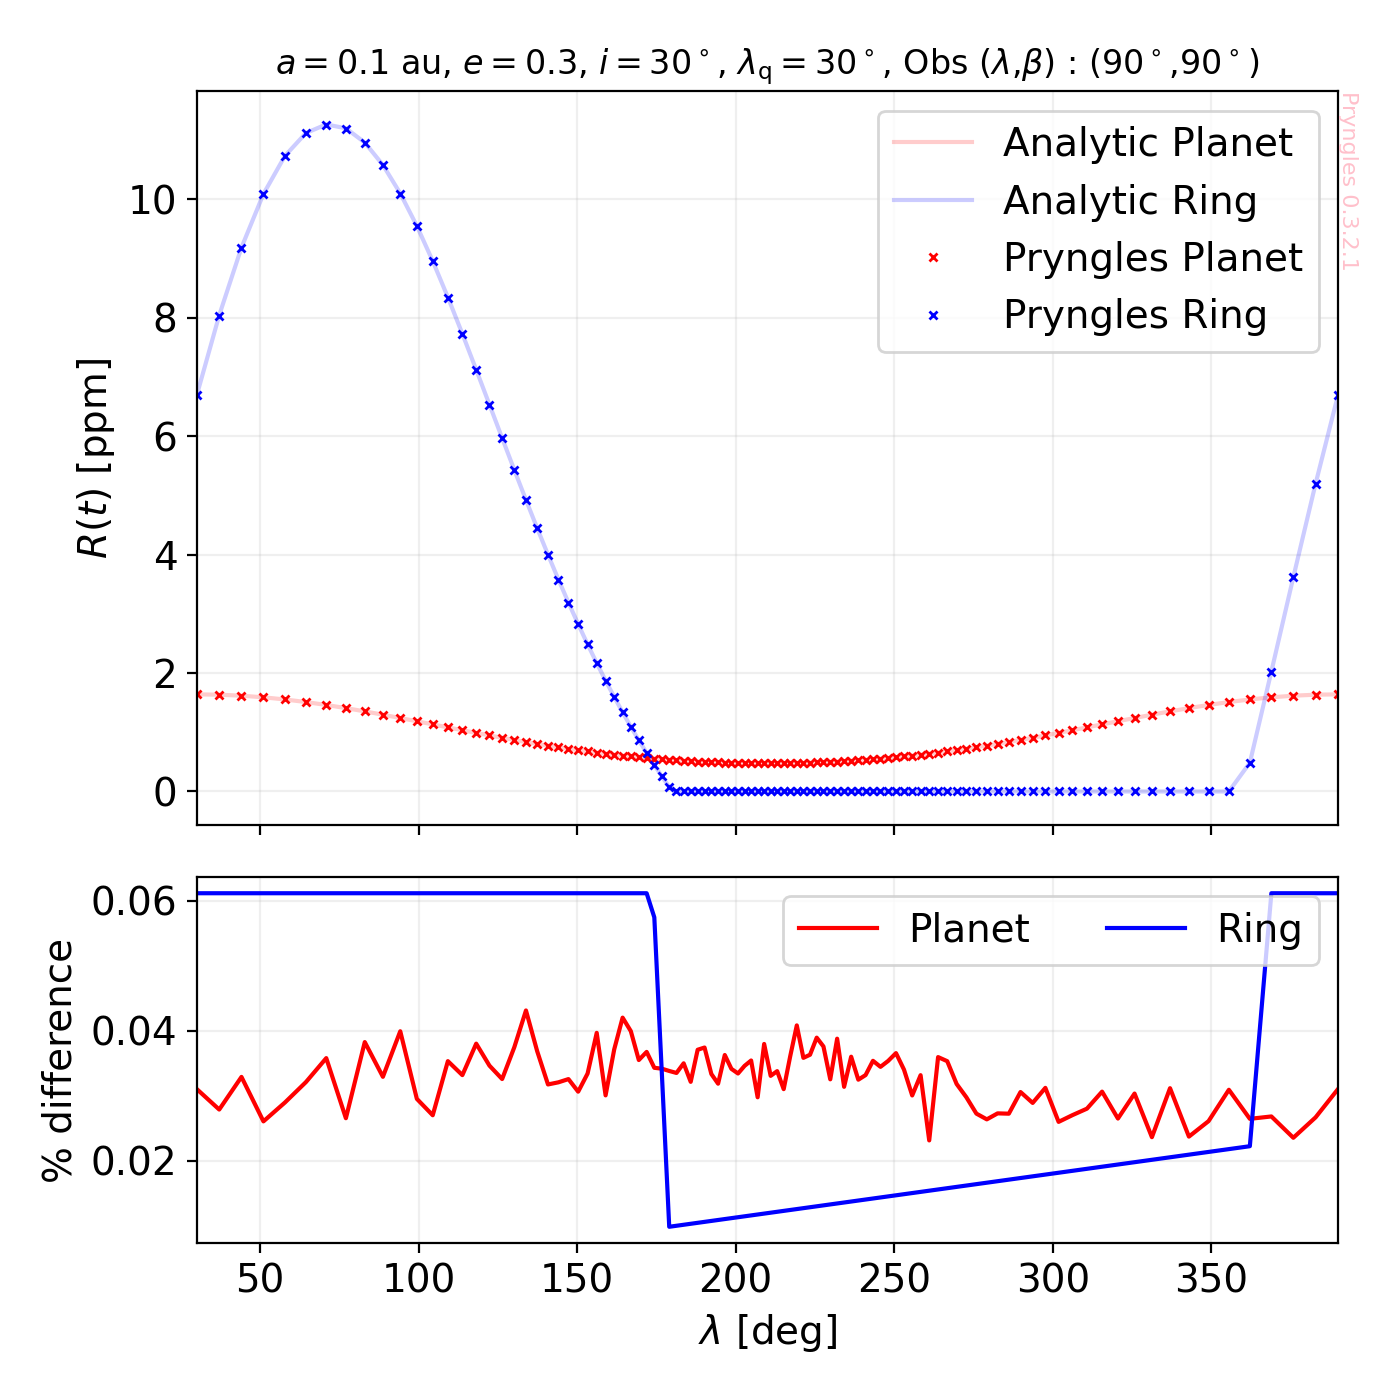

In [651]:
fig,axs=plt.subplots(2,1,gridspec_kw={'height_ratios': [2, 1]},figsize=(7,7),sharex=True)

ax=axs[0]
ax.plot(lambs*pr.RAD,Raps*PPM,'r-',alpha=0.2,label="Analytic Planet")
ax.plot(lambs*pr.RAD,Rars*PPM,'b-',alpha=0.2,label="Analytic Ring")
ax.plot(lambs*pr.RAD,1e6*Rps,'rx',ms=3,label="Pryngles Planet")
ax.plot(lambs*pr.RAD,1e6*Rrs,'bx',ms=3,label="Pryngles Ring")

ax.legend()
ax.set_ylabel("$R(t)$ [ppm]")
ax.margins(x=0)
title=f"$a={ringpars['a']:g}$ au, $e={ringpars['e']:g}$, $i={ringpars['i']*pr.RAD:g}^\circ$, $\lambda_\mathrm{{q}}={ringpars['lambq']*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({posobs[0]*pr.RAD:g}$^\circ$,{posobs[1]*pr.RAD:g}$^\circ$)"
ax.set_title(title,fontsize=12)
pr.Extra.prynglesMark(ax)

#Residuals
ax=axs[1]
resp=(Raps*PPM-1e6*Rps)/(Raps*PPM)*100
ax.plot(lambs*pr.RAD,resp,'r-',label="Planet")

ax=axs[1]
cond=Rars>0
resr=(Rars[cond]*PPM-1e6*Rrs[cond])/(Rars[cond]*PPM)*100
ax.plot(lambs[cond]*pr.RAD,resr,'b-',label="Ring")

ax.legend(ncol=2)
ax.set_ylabel("% difference")
ax.margins(x=0)

#Common decoration
ax=axs[1]
ax.set_xlabel(f"$\lambda$ [deg]")

for ax in axs:
    ax.grid(alpha=0.2)
    
fig.tight_layout()
fig.savefig(f"figures/analytical-faceon.png", dpi=250, facecolor="w")

## Albedo as a function of phase angle

<IPython.core.display.Javascript object>


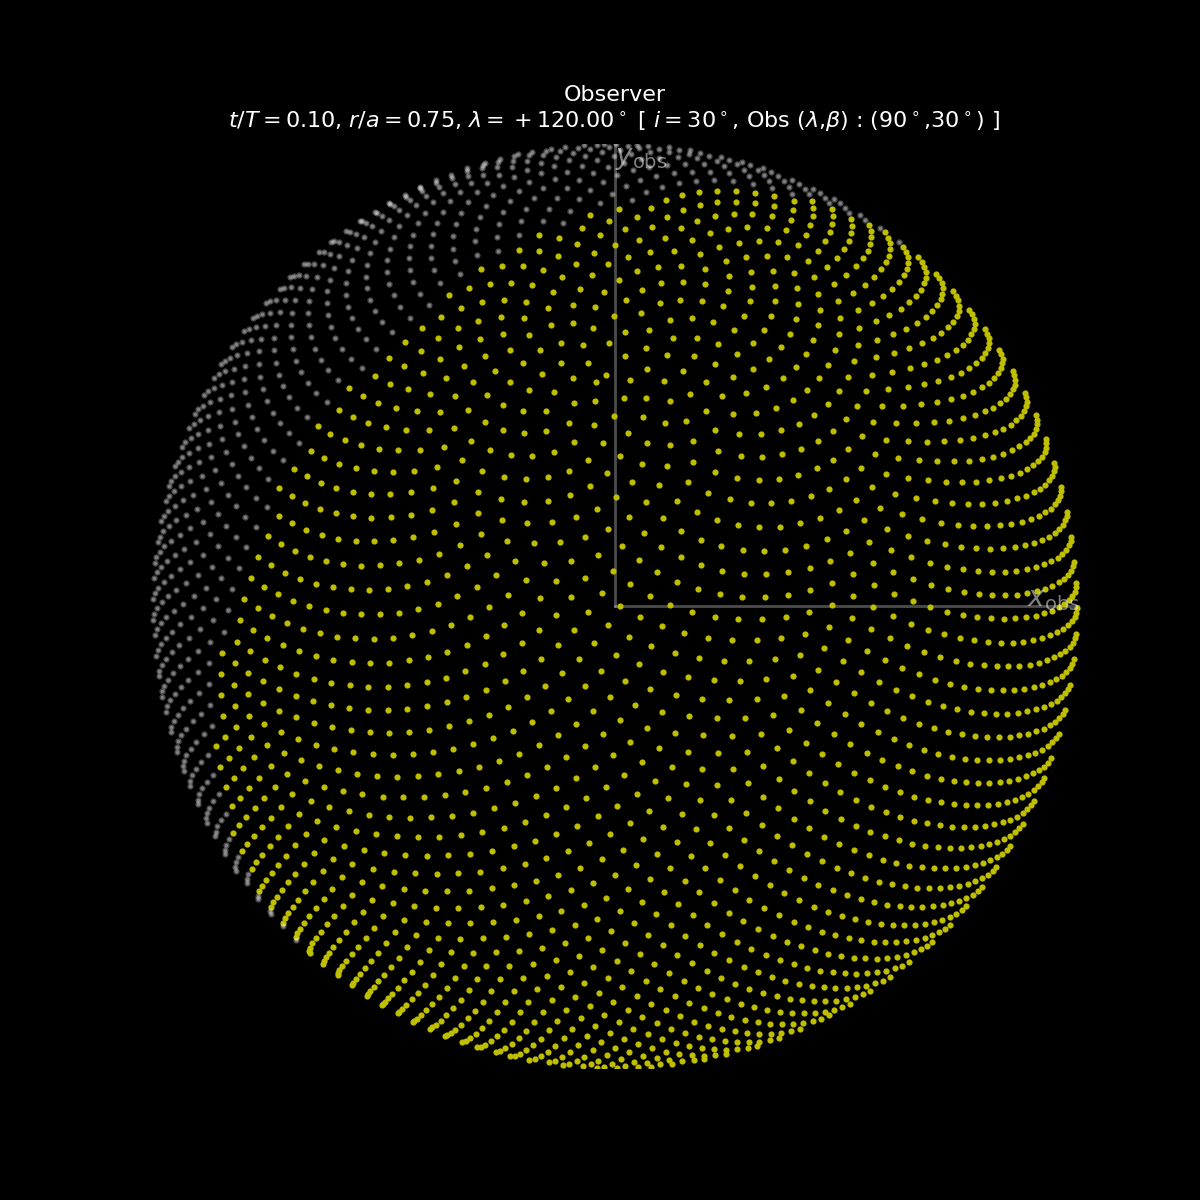

In [652]:
c=color[1]
posobs=[90*pr.DEG,30*pr.DEG]
AL=1
AS=1
#Lambertian
law=lambda x,y:x
ringpars=dict(i=30*pr.DEG,lambq=30*pr.DEG,a=0.1,e=0.5,physics=dict(AL=AL,AS=AS,taug=1,reflection_rings_law=law))
ts,lambs,Rps,Rrs,S,P=lightCurveTime(posobs,**ringpars)
cu2day=P.CU.UT/pr.Const.days
#"""
P.changeStellarPosition(120.0*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showring=0)
plt.close("all")
fig2

<IPython.core.display.Javascript object>


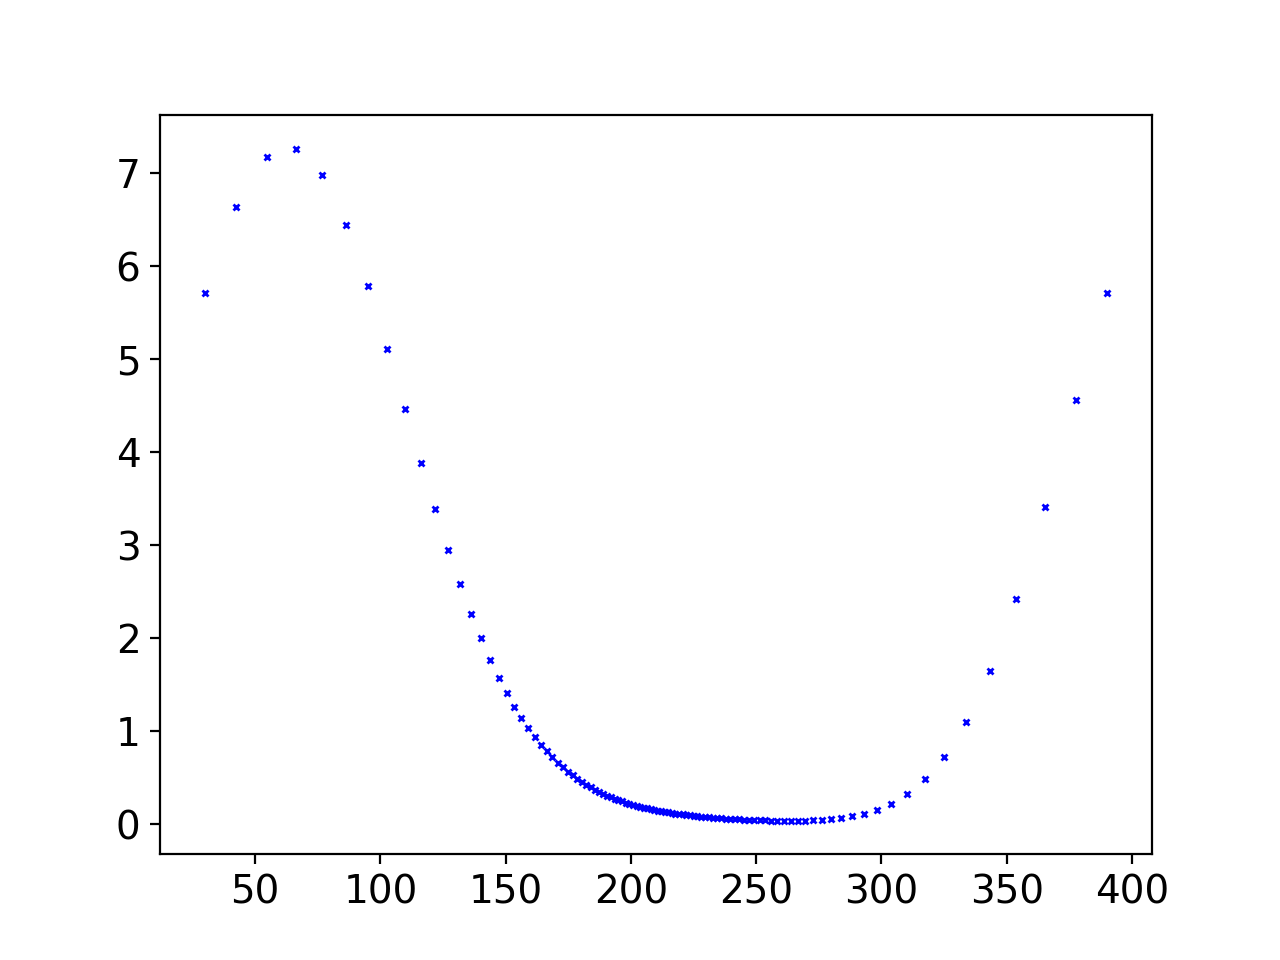

In [653]:
fig=plt.figure()
ax=fig.gca()

ax.plot(lambs*pr.RAD,1e6*Rps,'bx',ms=2,label="Pryngles Planet")

In [654]:
#Orbit
orbit=pyasl.KeplerEllipse(a=P.a,per=P.T,e=P.e,tau=0,Omega=0.0,i=0.0,w=P.lambq*pr.RAD)

#Normal to the ring (ecliptic coordinates)
nr=np.array((0,np.sin(P.i),np.cos(P.i)))
#Normal to the observer
no=P.nobs_ecl
#Area of the planet
Ap=np.pi*P.Rp**2
#Geometric Albedo (Dyudina et al. 2016)
p=2*AS/3
Raps=[]
for t in ts:
    #Distance of the star to the planet
    rvec=orbit.xyzPos(t)
    r=np.linalg.norm(rvec)
    #Vector to the star
    ns=np.array([rvec[0],rvec[1],0])/r
    #Phase
    cosa=np.dot(ns,no)
    a=np.arccos(cosa)
    sina=np.sin(a)
    #Epsilon factor: Seager et al. 2000, paragraph before eq. (3) and Russel et al. 1916, paragraph befor eq. (4)
    epsilon=p*(P.Rp**2/(4*(r/P.Rstar)**2))
    #Phase function
    phi=(sina+(np.pi-a)*cosa)/np.pi
    Rp=epsilon*phi
    Raps+=[Rp]
    
Raps=np.array(Raps)

<IPython.core.display.Javascript object>


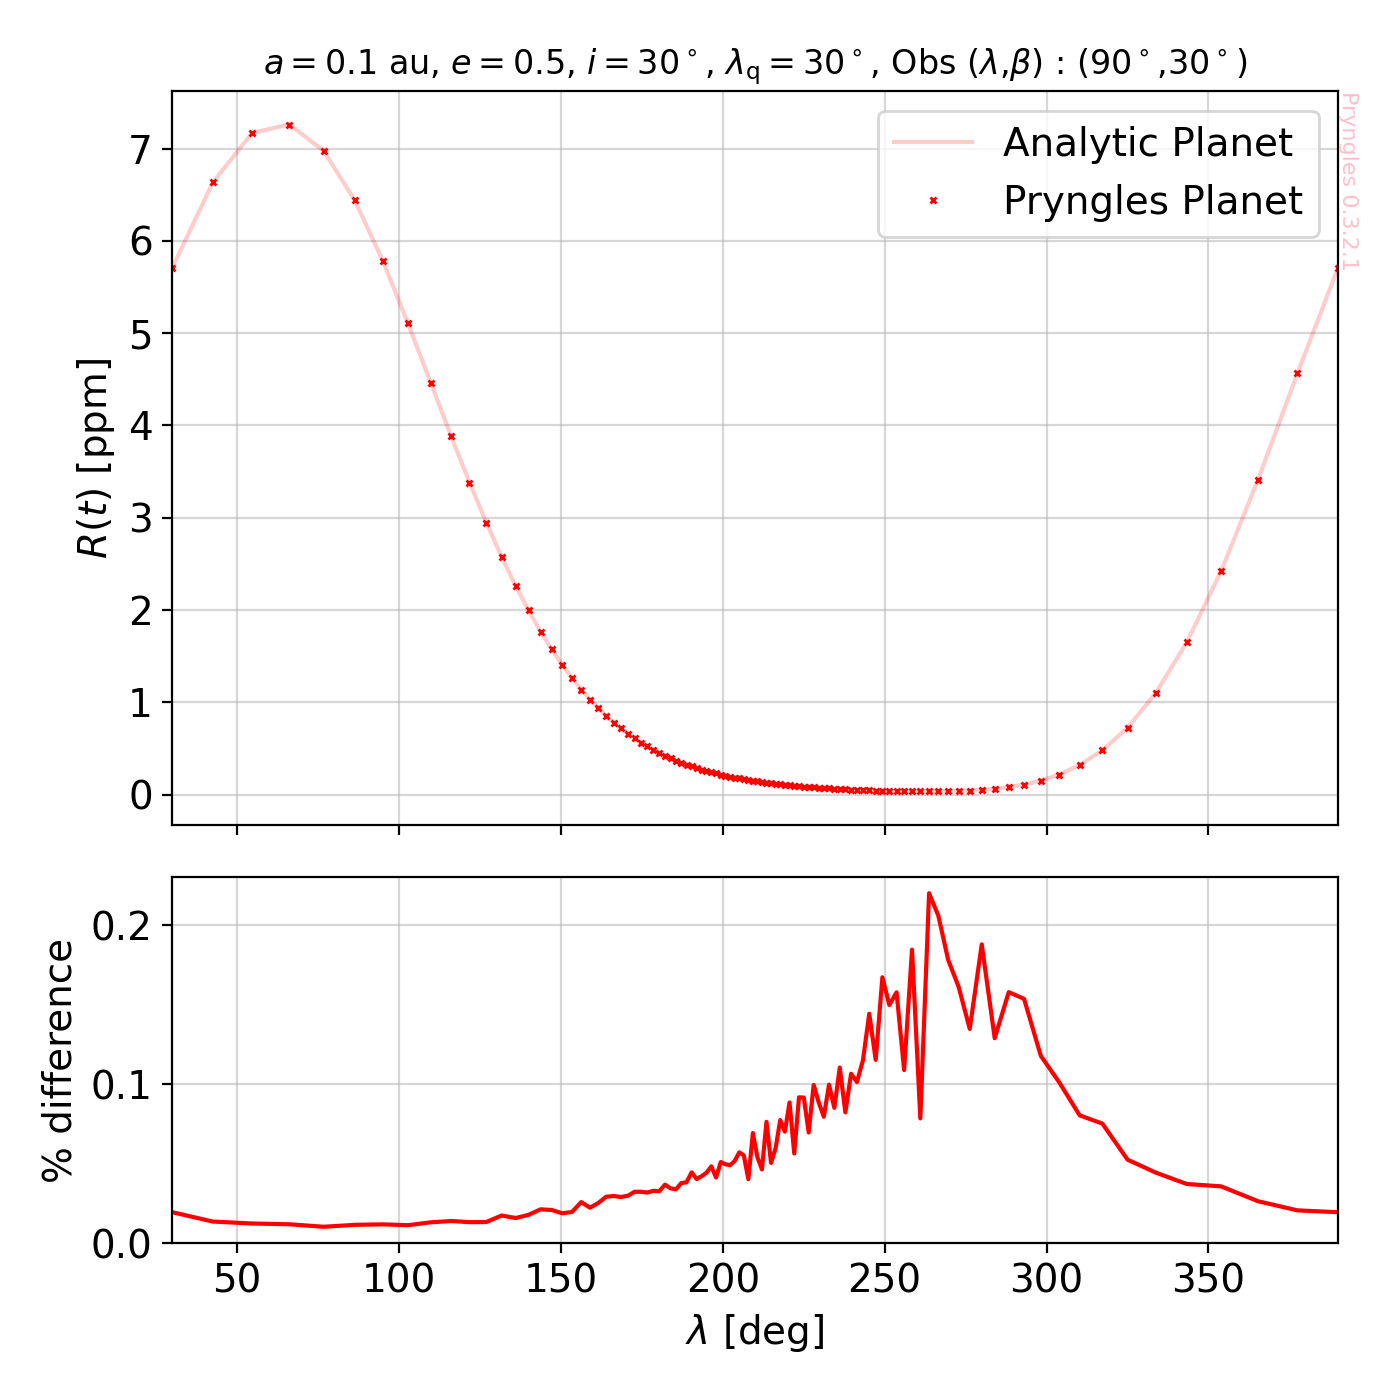

In [656]:
fig,axs=plt.subplots(2,1,gridspec_kw={'height_ratios': [2, 1]},figsize=(7,7),sharex=True)

ax=axs[0]
ax.plot(lambs*pr.RAD,PPM*Raps,'r-',alpha=0.2,label="Analytic Planet")
ax.plot(lambs*pr.RAD,PPM*Rps,'rx',ms=2,label="Pryngles Planet")
ax.legend()
ax.set_ylabel("$R(t)$ [ppm]")
ax.margins(x=0)

title=f"$a={ringpars['a']:g}$ au, $e={ringpars['e']:g}$, $i={ringpars['i']*pr.RAD:g}^\circ$, $\lambda_\mathrm{{q}}={ringpars['lambq']*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({posobs[0]*pr.RAD:g}$^\circ$,{posobs[1]*pr.RAD:g}$^\circ$)"
ax.set_title(title,fontsize=12)
pr.Extra.prynglesMark(ax)

#Residuals
ax=axs[1]
resp=(Raps*PPM-PPM*Rps)/(Raps*PPM)*100
ax.plot(lambs*pr.RAD,resp,'r-')
ax.set_ylabel("% difference")
ax.margins(x=0)

#Common decoration
ax=axs[1]
for ax in axs:ax.grid(alpha=0.5)
ax.set_xlabel(f"$\lambda$ [deg]")
fig.tight_layout()
fig.savefig(f"figures/analytical-edgeon.png", dpi=250, facecolor="w")